# A1.2 Regresión lineal simple

En este bloque de código se importa la librería pandas para utilizar la función read_csv y cargar los datos del archivo A1.2 Felicidad y GDP.csv. Luego, con la función sort_values, se ordenan los datos de mayor a menor según las columnas de Felicidad y GDP por separado. Finalmente, se imprimen las primeras 10 filas de cada conjunto ordenado, mostrando primero los países con mayor índice de felicidad y después los de mayor GDP.

In [1]:
import pandas as pd
data = pd.read_csv("A1.2 Felicidad y GDP.csv")
sort_felicidad = data.sort_values("Felicidad", ascending=False)
sort_GDP = data.sort_values("GDP", ascending=False)
print(sort_felicidad.head(10))
print(sort_GDP.head(10))

          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11
               Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
16   United Kingdom     6.9425  2.756900e+12
130           India     3.7771  2.667690e+12
19           France     6.6867  2.630320e+12
29            Italy     6.4667  1.892570e+12
14           Canada     7.0251  1.645420e+12
57      South Korea     5.9351  1.637900e+12


En el siguiente bloque de código se importa la librería numpy para el procesamiento numérico, donde se define x como el logaritmo base 10 del GDP (aplicado para trabajar con escalas más manejables) y y como los valores de Felicidad del dataset. De igual manera, se agrega la librería matplotlib.pyplot para graficar con ayuda de scatter los datos establecidos. Finalmente, se nombra la figura, los ejes y con la función show se imprime en la consola.

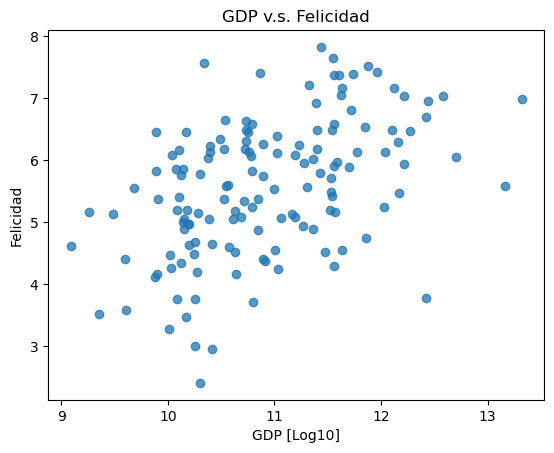

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.log10(data["GDP"])
y = data.Felicidad
plt.scatter(x, y, alpha=0.75)
plt.title("GDP v.s. Felicidad")
plt.ylabel("Felicidad")
plt.xlabel("GDP [Log10]")
plt.show()

A continuación se obtendrán los valores de B₁ y B₀  para la regresión lineal. Primeramente se calculan los promedios de x y y  para usar en las fórmulas:

**Fórmulas:**
$$ \beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} $$

$$\beta_0 = \bar{y} - \beta_1 \bar{x} $$

Finalmente se imprimen los valores de B1 y B0 calculados.

In [3]:
x_prom = np.mean(x)
y_prom = np.mean(y)
B1_num = sum((x-x_prom)*(y-y_prom))
B1_den = sum((x-x_prom)**2)
B1 = B1_num / B1_den
B0 = y_prom - (B1*x_prom)
print("B0 =",B0)
print("B1 =",B1)

B0 = -1.3023500570747277
B1 = 0.6281284658810408


En este bloque de código se vuelve a utilizar la función scatter para graficar los datos de x y y. Con los coeficientes previamente calculados (B₀ y B₁), se traza en color rojo la recta de regresión lineal $\hat{y} = \beta_0 + \beta_1 x$. Finalmente, se agregan las etiquetas a los ejes y se muestra la gráfica mediante la función show.

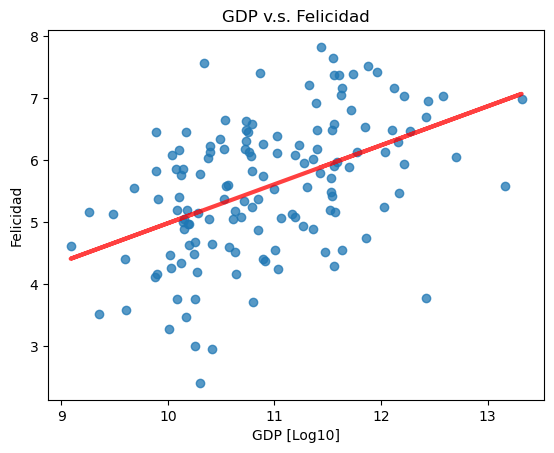

In [4]:
plt.scatter(x, y, alpha=0.75)
yHat = B0 + B1*x
plt.plot(x, yHat, c = "r", linewidth = 3, alpha = 0.75)
plt.title("GDP v.s. Felicidad")
plt.ylabel("Felicidad")
plt.xlabel("GDP [Log10]")
plt.show()

A continuación se calcula el El RSS (Residual Sum of Squares) utilizando la fórmula:
$$ RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

In [5]:
RSS = sum((y - yHat)**2)
print("RSS =", RSS)

RSS = 131.3738317732635


En el siguiente bloque de código se realizan los cálculos para el error estándar y el intervalo de confianza de B1.  Primero, se obtiene la longitud de los datos y, con la fórmula:  

$$ SE_{B_1} = \sqrt{\frac{RSS}{(n-2)\sum (x_i - \bar{x})^2}}$$

se calcula el error estándar, y se imprimen en la consola.  

Posteriormente, se hace uso de la función t.interval de la librería scipy.stats para obtener el percentil correspondiente con un 95% de confianza.  Finalmente, se calculan los límites inferior y superior del intervalo de confianza para B1 y se muestran como salida.  


In [6]:
import scipy.stats as st
n = len(x)
SEB1 = np.sqrt(RSS / ((n-2)*sum((x-x_prom)**2)))
print("SE =", SEB1)
per = st.t.interval(confidence=0.95, df=n-2)[1]
CIlow = B1 - per*SEB1
CIhigh = B1 + per*SEB1
print("Intervalo de confianza: (",CIlow,",",CIhigh,")")

SE = 0.09983378435340727
Intervalo de confianza: ( 0.4307393313073311 , 0.8255176004547504 )


Ya que el error estándar es pequeño en comparación con B1, se puede decir que la estimación de la pendiente es relativamente precisa. Además, el intervalo de confianza al 95% va aproximadamente de 0.43 a 0.83, lo que indica que la relación entre las variables es positiva. En otras palabras, hay un 95% de confianza en que, a mayor GDP (log10), mayor nivel de felicidad, con una pendiente (B1) que se ubica entre 0.43 y 0.83.

En este fragmento de código se calculan el Residual Standard Error (RSE) y el coeficiente $ R^2 $.  

Primero, se obtiene el error estándar residual mediante la fórmula:  

$$ RSE = \sqrt{\frac{RSS}{n-2}} $$

Posteriormente, se calcula la suma total de los cuadrados:  

$$ TSS = \sum (y_i - \bar{y})^2 $$

y con ello, el coeficiente de determinación:  

$$ R^2 = 1 - \frac{RSS}{TSS}$$

Finalmente, se imprimen ambos valores.  

In [7]:
RSE=np.sqrt(RSS/(n-2))
TSS=sum((y-y_prom)**2)
R2=1-RSS/TSS
print("Residual standard error =",RSE)
print("R^2 =",R2)

Residual standard error = 0.9721807858537376
R^2 = 0.22166361654970657


El R² es de 0.22, lo que quiere decir que el modelo lineal solo explica una parte de la variación en la felicidad; es decir, que hay otros factores que también la afectan, por lo que los datos se dispersan de manera significativa alrededor de la recta.

Finalmente, se usa la función OLS() de la librería statsmodels.api para verificar que los resultados de todos los puntos anteriores son los esperados.  
- summary() muestra un resumen estadístico del modelo.  
- pvalues imprime los valores p de los coeficientes.  
- Finalmente, se calcula el Residual Standard Error (RSE).  

In [8]:
import statsmodels.api as sm
model = sm.OLS(y,sm.add_constant(x))
results = model.fit()
print(results.summary())
print(results.pvalues)
print("RSE:", (results.scale)**0.5) 

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           3.83e-09
Time:                        00:59:44   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2